### ASSIGNMENT - 17
### Topic - SVM (Forest)
### By Tushar N. Mondkar (Batch of 27 March,Andheri)
### Mentor - Jayantilal Sir

__Q. Prepare a classification model using SVM for salary data__ 

In [1]:
# importing the necesary packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
# importing the dataset

sal_train = pd.read_csv('SalaryData_Train(1).csv')
sal_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
sal_test = pd.read_csv('SalaryData_Test(1).csv')
sal_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [4]:
#Checking of null values and data_types

sal_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [5]:
sal_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [6]:
# Understanding the data

sal_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


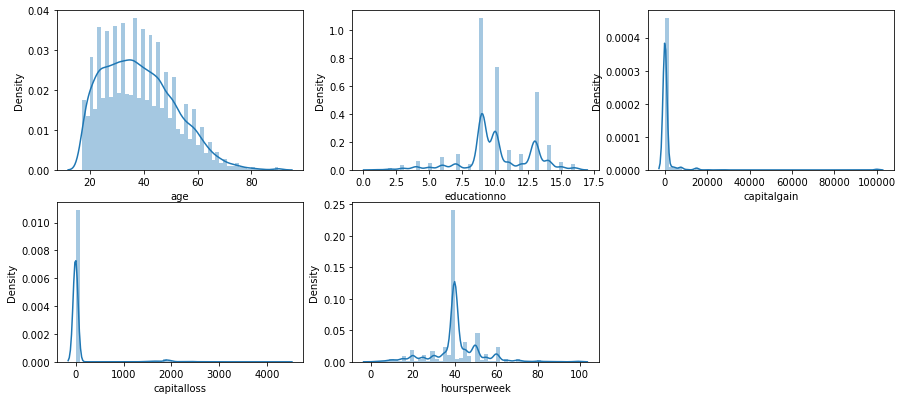

In [7]:
plt.figure(figsize = (15,10))

plt.subplot(3,3,1)
sns.distplot(sal_train["age"])

plt.subplot(3,3,2)
sns.distplot(sal_train["educationno"])

plt.subplot(3,3,3)
sns.distplot(sal_train["capitalgain"])

plt.subplot(3,3,4)
sns.distplot(sal_train["capitalloss"])

plt.subplot(3,3,5)
sns.distplot(sal_train["hoursperweek"])

plt.show()

__Note - From describe function and density plot it is quiet evident that data is non uniformly distributed.__


__Labeling is necessary to convert categorical data to numerical one__

In [8]:
print('colums of a salry_train data are : {}'.format(sal_train.columns))
print('colums of a salry_train data are : {}'.format(sal_test.columns))

colums of a salry_train data are : Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')
colums of a salry_train data are : Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')


In [9]:
string_col=['workclass','education','maritalstatus','occupation','relationship','race','sex','native']

In [10]:
# Encoding
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
for i in string_col:
    sal_train[i]=label_encoder.fit_transform(sal_train[i])
    sal_test[i]=label_encoder.fit_transform(sal_test[i])

In [11]:
sal_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,<=50K
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,>50K
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,<=50K
30159,22,2,11,9,4,0,3,4,1,0,0,20,37,<=50K


In [12]:
# Splitting of data

train_x=sal_train.iloc[0:500,0:13]
train_y=sal_train.iloc[0:500,13]
test_x=sal_test.iloc[0:300,0:13]
test_y=sal_test.iloc[0:300,13]

### Model building

In [13]:
# Building of model 

model_linear=SVC(kernel='linear')
model_linear.fit(train_x,train_y)


SVC(kernel='linear')

In [14]:
train_pred_lin=model_linear.predict(train_x)

In [15]:
test_pred_lin=model_linear.predict(test_x)

In [16]:
train_lin_acc=np.mean(train_pred_lin==train_y)
test_lin_acc=np.mean(test_pred_lin==test_y)
print('train accuracy is',(train_lin_acc))
print('train accuracy is',(test_lin_acc))

train accuracy is 0.818
train accuracy is 0.8166666666666667


In [17]:
confusion_matrix(test_y,test_pred_lin)

array([[218,  10],
       [ 45,  27]], dtype=int64)

In [18]:
clr = classification_report(test_y,test_pred_lin)
print(clr)

              precision    recall  f1-score   support

       <=50K       0.83      0.96      0.89       228
        >50K       0.73      0.38      0.50        72

    accuracy                           0.82       300
   macro avg       0.78      0.67      0.69       300
weighted avg       0.81      0.82      0.79       300



__Note - We could have used GridSearchCv to determine optimum parameter , but due to size of data it will take a lot of computational time.Hence using linear model directly which gives significant accuracy__